In [1]:
import pandas as pd
import sklearn
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from fbprophet import Prophet

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

series = read_csv("../data/IndFlaMin.csv", header=0, parse_dates=[1], squeeze=True, date_parser=parser).drop(columns=["Unnamed: 0"])
print(series)

           Date    Index  Inflation  FedMinWage
0    1913-01-01    9.800       0.00        0.00
1    1913-02-01    9.800       0.00        0.00
2    1913-03-01    9.800       0.00        0.00
3    1913-04-01    9.800       0.00        0.00
4    1913-05-01    9.700      -1.02        0.00
...         ...      ...        ...         ...
1208 2013-09-01  234.149       0.12        7.25
1209 2013-10-01  233.546      -0.26        7.25
1210 2013-11-01  233.069      -0.20        7.25
1211 2013-12-01  233.049      -0.01        7.25
1212 2014-01-01  233.916       0.37        7.25

[1213 rows x 4 columns]


In [3]:
series = series.rename(columns={"Date":"ds"})
series

,ds,Index,Inflation,FedMinWage
0,1913-01-01,9.800,0.00,0.00
1,1913-02-01,9.800,0.00,0.00
2,1913-03-01,9.800,0.00,0.00
3,1913-04-01,9.800,0.00,0.00
4,1913-05-01,9.700,-1.02,0.00
...,...,...,...,...
1208,2013-09-01,234.149,0.12,7.25
1209,2013-10-01,233.546,-0.26,7.25
1210,2013-11-01,233.069,-0.20,7.25
1211,2013-12-01,233.049,-0.01,7.25


In [4]:
cpi = series[["ds","Index"]]

In [5]:
cpi = cpi.rename(columns={"Index":"y"})

In [6]:
cpi

,ds,y
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700
...,...,...
1208,2013-09-01,234.149
1209,2013-10-01,233.546
1210,2013-11-01,233.069
1211,2013-12-01,233.049


In [7]:
#This is CPI MODEL
cpiModel = Prophet(seasonality_mode="multiplicative")
cpiModel.fit(cpi)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
#This is CPI Future empty data frames
cpiFuture = cpiModel.make_future_dataframe(periods=120, freq="MS")
cpiFuture.tail()

,ds
1328,2023-09-01
1329,2023-10-01
1330,2023-11-01
1331,2023-12-01
1332,2024-01-01


In [9]:
#This is CPI forecast to the empties
cpiForecast = cpiModel.predict(cpiFuture)
cpiForecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1328,2023-09-01,279.414724,266.704720,292.086292
1329,2023-10-01,279.227007,266.188748,292.174302
1330,2023-11-01,279.093138,266.040593,292.295123
1331,2023-12-01,278.677475,265.265496,292.260013
1332,2024-01-01,279.443035,265.681929,292.905611


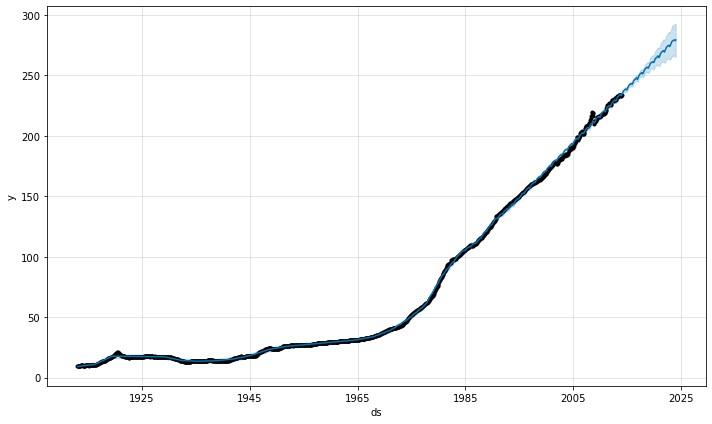

In [10]:
#This is CPI 10 year forecast from 2014
fig1 = cpiModel.plot(cpiForecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


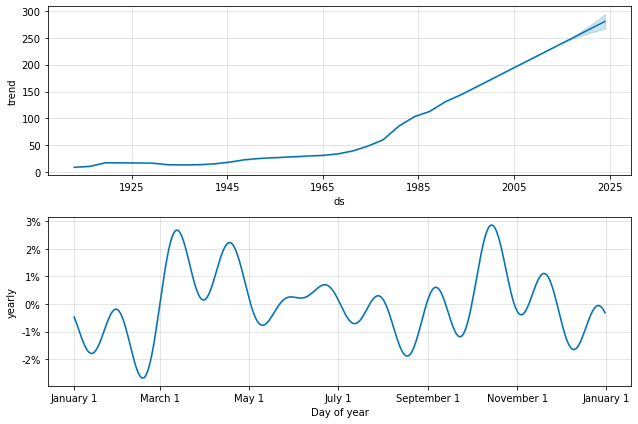

In [11]:
##This is CPI Description
fig2 = cpiModel.plot_components(cpiForecast)

In [12]:
series

,ds,Index,Inflation,FedMinWage
0,1913-01-01,9.800,0.00,0.00
1,1913-02-01,9.800,0.00,0.00
2,1913-03-01,9.800,0.00,0.00
3,1913-04-01,9.800,0.00,0.00
4,1913-05-01,9.700,-1.02,0.00
...,...,...,...,...
1208,2013-09-01,234.149,0.12,7.25
1209,2013-10-01,233.546,-0.26,7.25
1210,2013-11-01,233.069,-0.20,7.25
1211,2013-12-01,233.049,-0.01,7.25


In [13]:
inf = series[["ds","Inflation"]]
inf = inf.rename(columns={"Inflation":"y"})

In [14]:
inf

,ds,y
0,1913-01-01,0.00
1,1913-02-01,0.00
2,1913-03-01,0.00
3,1913-04-01,0.00
4,1913-05-01,-1.02
...,...,...
1208,2013-09-01,0.12
1209,2013-10-01,-0.26
1210,2013-11-01,-0.20
1211,2013-12-01,-0.01


In [15]:
#This is Inflation MODEL
infModel = Prophet(seasonality_mode="multiplicative")
infModel.fit(inf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
#This is Inflation Future empty data frames
infFuture = infModel.make_future_dataframe(periods=120, freq = "MS")
infFuture.tail()

,ds
1328,2023-09-01
1329,2023-10-01
1330,2023-11-01
1331,2023-12-01
1332,2024-01-01


In [142]:
#This is Inflation forecast to the empties
infForecast = infModel.predict(infFuture)

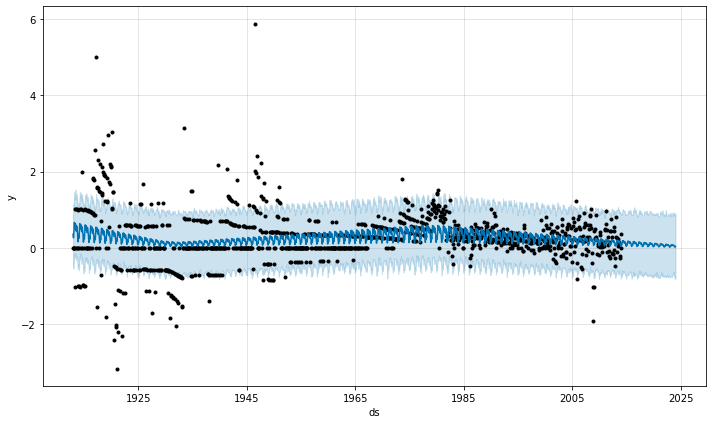

In [18]:
#This is Inflation 10 year forecast from 2014
fig3 = infModel.plot(infForecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


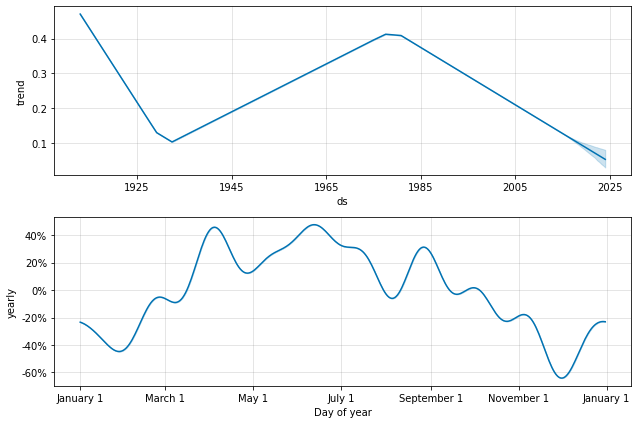

In [19]:
#This is Inflation description
fig4 = infModel.plot_components(infForecast)

In [20]:
fmw = series[["ds","FedMinWage"]]
fmw = fmw.rename(columns={"FedMinWage":"y"})
fmw

,ds,y
0,1913-01-01,0.00
1,1913-02-01,0.00
2,1913-03-01,0.00
3,1913-04-01,0.00
4,1913-05-01,0.00
...,...,...
1208,2013-09-01,7.25
1209,2013-10-01,7.25
1210,2013-11-01,7.25
1211,2013-12-01,7.25


In [21]:
#This is Federal Min Wage MODEL
fmwModel = Prophet(seasonality_mode="multiplicative")
fmwModel.fit(fmw)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
#This is Federal Min Wage Future empty data frames
fmwFuture = fmwModel.make_future_dataframe(periods=120, freq = "MS")
fmwFuture.tail()

,ds
1328,2023-09-01
1329,2023-10-01
1330,2023-11-01
1331,2023-12-01
1332,2024-01-01


In [150]:
#This is Fed Min Wage forecast to the empties
fmwForecast = fmwModel.predict(fmwFuture)

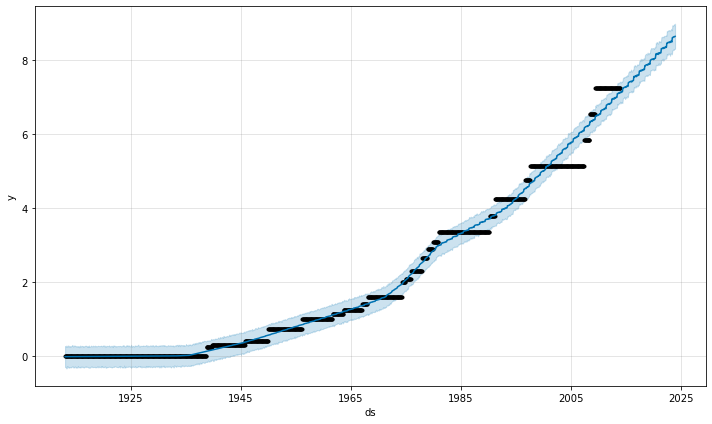

In [24]:
# Fed min wage 10 year forecast
fig5 = fmwModel.plot(fmwForecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


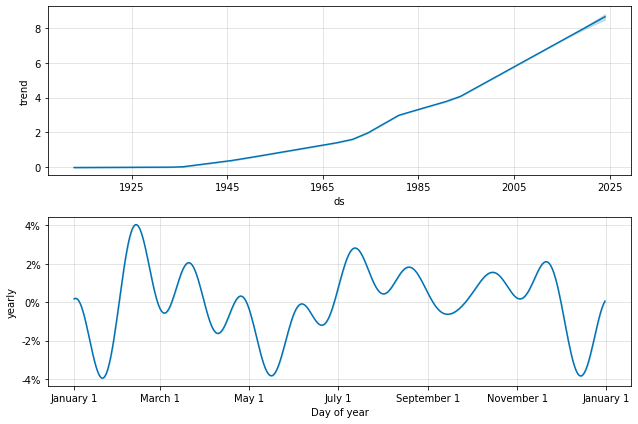

In [25]:
#fedminwage data description
fig5 = fmwModel.plot_components(fmwForecast)

In [44]:
cpiForecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1913-01-01,9.147507,7.456364,10.774187,9.147507,9.147507,-0.004715,-0.004715,-0.004715,-0.004715,-0.004715,-0.004715,0.0,0.0,0.0,9.104372
1,1913-02-01,9.192853,7.453836,10.779681,9.192853,9.192853,-0.002732,-0.002732,-0.002732,-0.002732,-0.002732,-0.002732,0.0,0.0,0.0,9.167735
2,1913-03-01,9.233810,7.602614,10.825308,9.233810,9.233810,0.000814,0.000814,0.000814,0.000814,0.000814,0.000814,0.0,0.0,0.0,9.241331
3,1913-04-01,9.279156,7.666325,10.958584,9.279156,9.279156,0.001732,0.001732,0.001732,0.001732,0.001732,0.001732,0.0,0.0,0.0,9.295226
4,1913-05-01,9.323039,7.655671,11.042856,9.323039,9.323039,0.001902,0.001902,0.001902,0.001902,0.001902,0.001902,0.0,0.0,0.0,9.340771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2023-09-01,278.988208,266.704720,292.086292,266.258750,291.769741,0.001529,0.001529,0.001529,0.001529,0.001529,0.001529,0.0,0.0,0.0,279.414724
1329,2023-10-01,279.360227,266.188748,292.174302,266.508350,292.267635,-0.000477,-0.000477,-0.000477,-0.000477,-0.000477,-0.000477,0.0,0.0,0.0,279.227007
1330,2023-11-01,279.744646,266.040593,292.295123,266.748556,292.858269,-0.002329,-0.002329,-0.002329,-0.002329,-0.002329,-0.002329,0.0,0.0,0.0,279.093138
1331,2023-12-01,280.116665,265.265496,292.260013,266.973874,293.392920,-0.005138,-0.005138,-0.005138,-0.005138,-0.005138,-0.005138,0.0,0.0,0.0,278.677475


In [67]:
onemonthforecast = cpiForecast[(cpiForecast["ds"] >= "2019-06-01") & (cpiForecast["ds"] < "2020-09-01")]
onemonthforecast = onemonthforecast[["ds","trend","yhat","yhat_lower","yhat_upper","trend_lower","trend_upper"]].set_index("ds")

In [68]:
threemonthforecast = cpiForecast[(cpiForecast["ds"] >= "2019-06-01") & (cpiForecast["ds"] < "2020-11-01")]
threemonthforecast = threemonthforecast[["ds","trend","yhat","yhat_lower","yhat_upper","trend_lower","trend_upper"]].set_index("ds")

In [75]:
sixmonthforecast = cpiForecast[(cpiForecast["ds"] >= "2019-06-01") & (cpiForecast["ds"] < "2021-03-01")]
sixmonthforecast = sixmonthforecast[["ds","trend","yhat","yhat_lower","yhat_upper","trend_lower","trend_upper"]].set_index("ds")

In [145]:
oneyearforecast = cpiForecast[(cpiForecast["ds"] >= "2019-06-01") & (cpiForecast["ds"] < "2021-09-01")]
oyXaxis = oneyearforecast["ds"].tolist()
oyYaxis = oneyearforecast.drop(columns=["multiplicative_terms","multiplicative_terms_lower","multiplicative_terms_upper","yearly","yearly_lower","yearly_upper","additive_terms","additive_terms_lower","additive_terms_upper","ds"])
oneyearforecast = oneyearforecast[["ds","trend","yhat","yhat_lower","yhat_upper","trend_lower","trend_upper"]].set_index("ds")

In [117]:
oyYaxis

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,yhat
1277,259.730041,255.676068,265.432160,254.976984,264.443425,260.380610
1278,260.102060,255.622363,265.841750,255.189567,264.919114,260.652144
1279,260.486479,255.615215,266.248288,255.427461,265.380369,260.980659
1280,260.870899,255.785226,266.775894,255.677565,265.942792,261.269717
1281,261.242917,255.770926,266.674028,255.966211,266.428170,261.118338
1282,261.627337,255.340878,266.639557,256.228450,266.923377,261.018023
1283,261.999355,255.131655,266.479422,256.435732,267.374875,260.653249
1284,262.383775,255.593005,267.054321,256.658987,267.875236,261.394064
1285,262.768194,256.494556,268.430062,256.909378,268.458144,262.173795
1286,263.127812,257.686112,270.095485,257.188756,268.994674,263.583566


In [119]:
import matplotlib.pyplot as plt

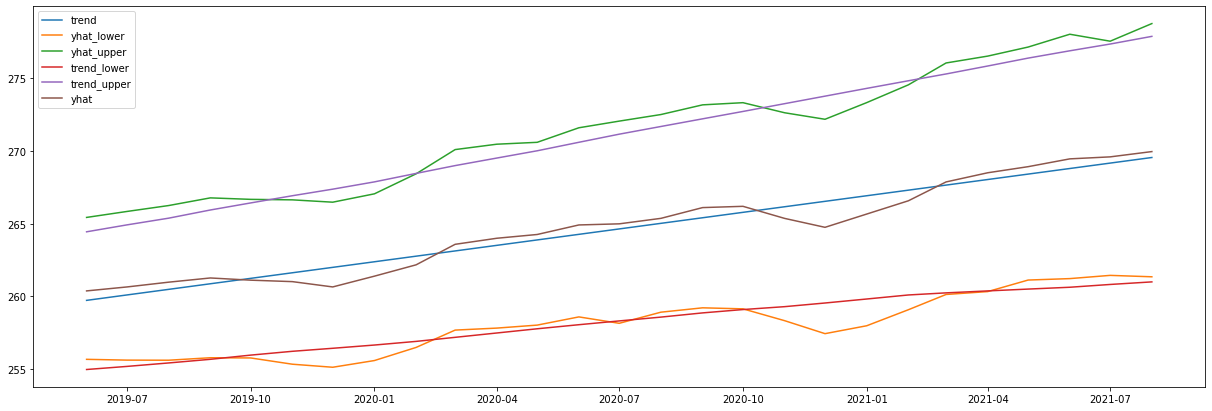

In [179]:
labels = oyYaxis
plt.figure(figsize=(21,7))
plt.plot(oyXaxis,oyYaxis)
plt.legend(labels=labels)
plt.savefig('cpioneyearForecast')
plt.show()


In [155]:
infoneyearforecast = infForecast[(cpiForecast["ds"] >= "2019-06-01") & (cpiForecast["ds"] < "2021-09-01")]
infXaxis = infoneyearforecast["ds"].tolist()
infYaxis = infoneyearforecast.drop(columns=["multiplicative_terms","multiplicative_terms_lower","multiplicative_terms_upper","yearly","yearly_lower","yearly_upper","additive_terms","additive_terms_lower","additive_terms_upper","ds"])
infoneyearforecast = infoneyearforecast[["ds","trend","yhat","yhat_lower","yhat_upper","trend_lower","trend_upper"]].set_index("ds")

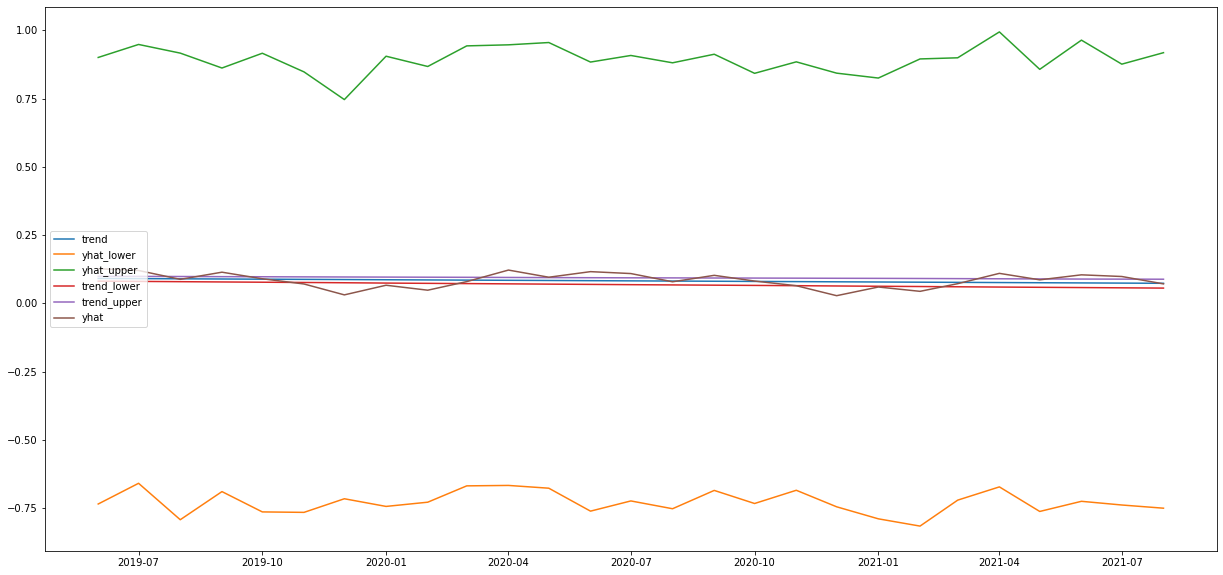

In [178]:
labels = infYaxis
plt.figure(figsize=(21,10))
plt.plot(infXaxis,infYaxis)
plt.legend(labels=labels,loc="center left")
plt.savefig('infoneyearForecast')
plt.show()

In [157]:
fmwoneyearforecast = fmwForecast[(cpiForecast["ds"] >= "2019-06-01") & (cpiForecast["ds"] < "2021-09-01")]
fmwXaxis = fmwoneyearforecast["ds"].tolist()
fmwYaxis = fmwoneyearforecast.drop(columns=["multiplicative_terms","multiplicative_terms_lower","multiplicative_terms_upper","yearly","yearly_lower","yearly_upper","additive_terms","additive_terms_lower","additive_terms_upper","ds"])
fmwoneyearforecast = fmwoneyearforecast[["ds","trend","yhat","yhat_lower","yhat_upper","trend_lower","trend_upper"]].set_index("ds")

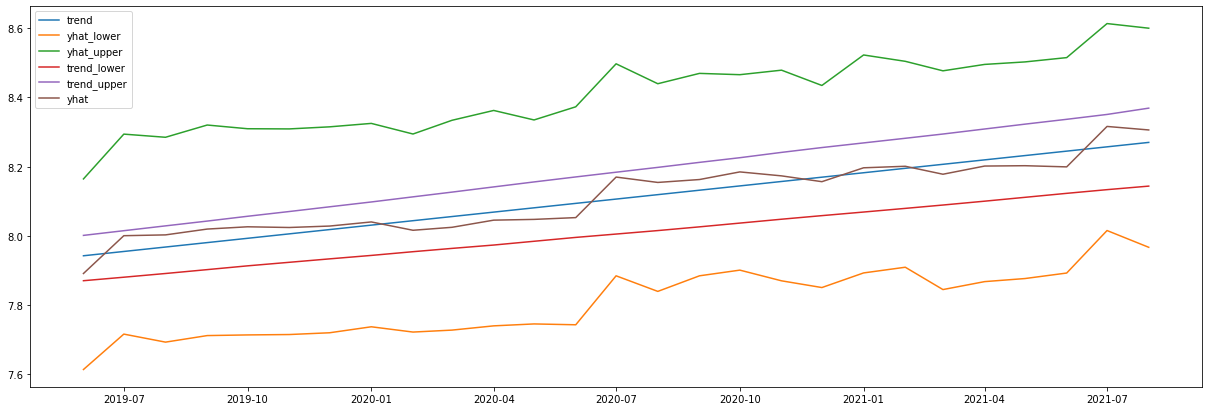

In [169]:
labels = fmwYaxis
plt.figure(figsize=(21,7))
plt.plot(fmwXaxis,fmwYaxis)
plt.legend(labels=labels)
plt.savefig('fmwoneyearForecast')
plt.show()